In [57]:
%matplotlib inline

#Load required modules
import sys, os, argparse
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns
import pandas as pd
import glob
import math
sns.set_style('whitegrid')

### Set up seaborn appearence
mpl.rc('text', usetex = True)
sns.set_context("notebook", font_scale=1.5)
plt.rc("axes.spines", top=True, right=True)
colors= [ "#d1fffc", "#edc9ff", "#00ada4", "#ae00ff", "#ffc18c", "#d66300"]
sns.set_palette(colors)

# Generate results file

In [113]:
with open("results.tsv", "w") as f:
    f.write("\t".join(["m", "seed", "method", "time", "log-time", "mu", "gamma"]) + "\n")
    for method in ["ILP", "DP"]:
        for filename in glob.glob("*.%s.out" % method):
            m = int(filename.split("_")[0][1:])
            mut = float(filename.split("_")[1][3:])
            seed = int(filename.rstrip(".%s.out" % method).split("_")[-1][4:])
            with open(filename) as ff:
                line = ff.readline().rstrip("\n").split("\t")
                time = float(line[-1])
                log_time = math.log10(time)
            if method == "ILP":
                mmethod = method + "-" + str(mut)
                mu = int(line[2])
                gamma = int(line[3])
            else:
                mmethod = "FPT" + "-" + str(mut)
                mu = int(line[1])
                gamma = int(line[2])
            f.write("\t".join(map(str, [m, seed, mmethod, time, log_time, mu, gamma])) + "\n")

# Generate plots

In [65]:
df = pd.read_csv("results.tsv", sep="\t")
df["m"] = df["m"] + 1
df.head()

,m,seed,method,time,log-time
0,6,23,ILP-1.0,3.307070,0.519443
1,4,62,ILP-0.1,0.194541,-0.710989
2,8,45,ILP-0.1,1.135680,0.055256
3,4,10,ILP-0.1,0.223725,-0.650285
4,6,23,ILP-0.1,0.823221,-0.084484


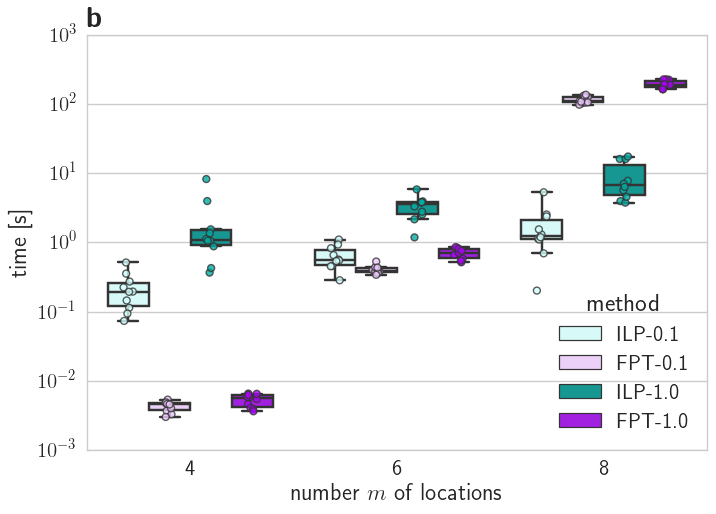

In [112]:
sns.stripplot(data=df, x="m", y="log-time", hue="method", 
              hue_order=["ILP-0.1", "FPT-0.1", "ILP-1.0", "FPT-1.0"], 
              split=True, jitter=True, alpha=0.8, linewidth=1)
ax = sns.boxplot(data=df, x="m", y="log-time", hue="method", 
                 hue_order=["ILP-0.1", "FPT-0.1", "ILP-1.0", "FPT-1.0"], 
                 showfliers=False)

# Get the handles and labels. For this example it'll be 2 tuples
# of length 4 each.
handles, labels = ax.get_legend_handles_labels()

# When creating the legend, only use the first two elements
# to effectively remove the last two.
l = plt.legend(handles[0:4], labels[0:4], title="method")

plt.xlabel("number $m$ of locations")
plt.ylabel("time [s]")
ax.set_yticklabels(["$10^{-3}$", "$10^{-2}$", "$10^{-1}$", "$10^0$", "$10^1$", "$10^2$", "$10^3$"])
ax.set_ylim((-3,3))

ax.set_title("\huge\\textbf{b}", loc='left')
plt.savefig("time.pdf")

In [81]:
%%bash
filename="sizes.txt"
rm $filename
for f in ../data/simulations/m?_mut*/T_seed*.vertex.labeling
do 
    echo -n "$f " >> $filename
    echo -n $(cat $f | cut -d' ' -f2 | sort -u | wc -l) >> $filename
    cat $(dirname $f)/$(basename $f .vertex.labeling).tree | wc -l >> $filename
done

In [84]:
with open("sizes.tsv", "w") as ff:
    ff.write("\t".join(["m", "mut", "seed", "n"]) + "\n")
    with open("sizes.txt") as f:
        for line in f:
            s = line.rstrip("\n").split()
            m = int(s[1])
            n = int(s[2])
            mut = float(s[0].split("/")[3].split("_")[1][3:])
            seed = int(s[0].split("/")[4].rstrip(".vertex.labeling")[6:])
            ff.write("\t".join(map(str, [m,mut,seed,n])) + "\n")

In [88]:
df2 = pd.read_csv("sizes.tsv", sep="\t")
df2.head()

,m,mut,seed,n
0,4,0.1,10,25
1,4,0.1,18,20
2,4,0.1,25,29
3,4,0.1,3,34
4,4,0.1,32,37


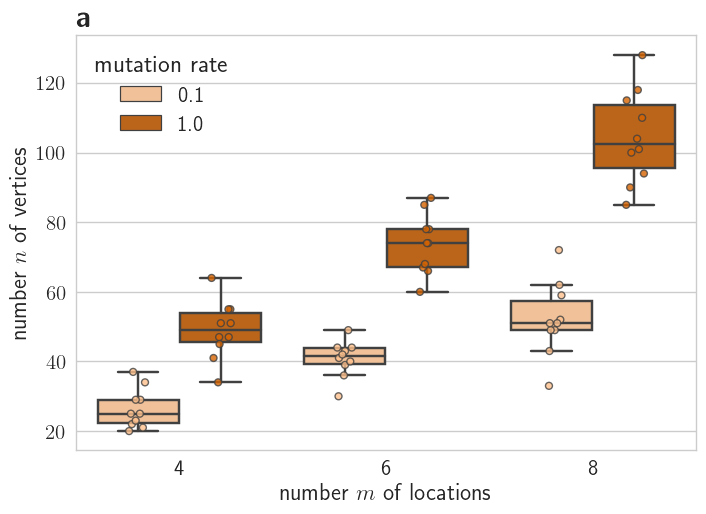

In [111]:
sns.stripplot(data=df2, x="m", y="n", hue="mut", order=[4,6,8],
              hue_order=[0.1, 1.0], palette=[colors[4],colors[5]],
              split=True, jitter=True, alpha=0.8, linewidth=1)
ax = sns.boxplot(data=df2, x="m", y="n", hue="mut", order=[4,6,8],
                 hue_order=[0.1, 1.0], palette=[colors[4],colors[5]], showfliers=False)


# Get the handles and labels. For this example it'll be 2 tuples
# of length 4 each.
handles, labels = ax.get_legend_handles_labels()

# When creating the legend, only use the first two elements
# to effectively remove the last two.
l = plt.legend(handles[0:2], labels[0:2], title="mutation rate")

plt.xlabel("number $m$ of locations")
plt.ylabel("number $n$ of vertices")

ax.set_title("\huge\\textbf{a}", loc='left')

plt.savefig("vertices.pdf")